### 1. measure linear separability

https://www.python-course.eu/linear_discriminant_analysis.php

Given mxn dimensional input $X_{mn}$, and expecting 1xn dimensional output $y_{1n}$, the Fishers Linear Discriminant Analysis (LDA) searches for the **linear** projection parameterized by $w_{m1}$, noted as $y_{1n} = w^T_{m1} * X_{mn}$, where the **separability** of the classes is maximized. The **separability** of the classes means that, the samples of a class should have the predictions closer to ground truth class, than to other classes.

********
Consider the optimization as **least square regresssion problem** from $X_{mn}$ to output $y_{1n}$, the regression loss is:

$\begin{align}
(1) Loss_w &= \sum_{c\in C} SE_c\\
    & =  \sum_{c\in C} \sum_{j\in N_c} [y({x_j}) - y({u_c})]^2 \\
    & =  \sum_{c\in C} \sum_{j\in N_c} (w^T * x_j - w^T * u_c)(w^T * x_j - w^T * u_c)^T\\
    & =  \sum_{c\in C} \sum_{j\in N_c}  w^T*(x_j - u_c)(x_j - u_c)^T * w\\
    & =  \sum_{c\in C}w^T * [\sum_{j\in N_c} (x_j - u_c)(x_j - u_c)^T] * w\\
    & =  w^T * S_W * w \\
\end{align}$

where $S_W$ is the within class scatter matrix, denoted as:

$\begin{align}
S_W =  \sum_{c \in C}\sum_{j \in N_{c}} (x_j - u_c)(x_j - u_c)^T\\
\end{align}$

Given that we have calculated the the scatter matrix , the computation of covariance matrix is straight forward. We just a have to scale by n-1 the scatter matrix values to compute the covariance matrix, which means:


$\begin{align}
Cov(X) &= \frac{\sum_{i\in N}\sum_{j\in N}(X_i - u)(X_j - u)^T}{N-1}\\
       &= \frac{\sum_{i\in N}\sum_{S_X}}{N-1}\\
S_X &= (N - 1) * Cov(X)\\
\end{align}$



$Loss_w$ represents how much the predictions deviate from the ground truth across all samples, noted as **Within Group Loss**. This is important information, but not enough, as **separatability** should be a notion reflecting the **contrast** between the confidence of an instance belonging to a class, and the confidence of belonging to other classes. $Loss_w$ measures how close are the predictions and ground truth labels, but it does not tell how far the predictions are away from the wrong labels (away from the faults). There should be a loss term measuring the scatter between different classes in the transformed space. Again, using the square error, the scatter between two classes a, b can be expressed as:

$\begin{align}
SE_{a,b \in C} & =  N_{a} * N_{b} * [(y(u_{a}) - y(u_{b})]^2 \\
& =    N_a * N_b * (w^T * u_a - w^T * u_b)(w^T * u_ia - w^T * u_b)^T\\
& =    N_a * N_b * w^T*[(u_a - u_b)(u_a - u_b)^T] * w\\
\end{align}$

When summing up all pairs, the overal becomes:

$\begin{align}
(2) Loss_b &= \sum^{a \neq b} SE_{a,b}\\
       &= w^T*\sum_{}^{a \neq b} N_a * N_b * [(u_a - u_b)(u_a - u_b)^T] * w\\
       &= w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u + u - u_b)^T] * w \\
       &= w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u)^T * w  + w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u - u_b)^T] * w \\
       &= w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u)^T * w  + w^T*\sum_{b,a}^{b \neq a}  N_b *N_a * [(u_b - u_a)(u_b - u)^T] * w \\
       &= 2 * w^T*\sum_{a,b}^{a \neq b}  N_a *N_b * [(u_a - u_b)(u_a - u)^T * w \\
       &= 2 * w^T*\sum_{a}N_a*\sum_{b \neq a} N_b * [(u_a - u_b)(u_a - u)^T * w \\
       &= 2 * w^T*\sum_{a}N_a*[\sum_{b \neq a} N_b * u_a - \sum_{b \neq a} N_b * u_b)]*(u_a - u)^T * w\\
       &= 2 * w^T*\sum_{a}N_a*[(N - N_a) * u_a - (N*u - N_a*u_a)]*(u_a - u)^T * w\\
       &= 2 * w^T*\sum_{a}N_a*[(N * u_a - N*u]*(u_a - u)^T * w\\
       &= 2 * w^T*\sum_{a}N * N_a*[(u_a - u]*(u_a - u)^T * w \\
       &= 2 * N * w^T*\sum_{c}N_c*[(u_c - u]*(u_c - u)^T * w \\
       &= 2 * N * w^T* S_B * w \\       
\end{align}$

where $S_B$ is the between class scatter matrix, denoted as:

$\begin{align}
S_B =  \sum_{c \in C} N_c (u_c - u)(u_c - u)^T\\
\end{align}$

Interestingly, $SB$ was initially defined as weighted sum of pairwised outerproduct of the class mean vectors in the transformed space, in the end, it's equilevant to calculate the weighted sum of the outer product of each class mean and the global mean in the transformed space.

Moreover, when summing up $S_W, S_B$, we get $S_T$ which captures the overal scatter of the samples:

$\begin{align}
(3) S_T &=  \sum_{x \in X} (x - u)(x - u)^T  \\
&=  \sum_{c \in C}\sum_{ j \in N_c} [(x_j - u_c) + (u_c - u)][(x_j - u_c) + (u_c - u)]^T \\
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T + \sum_{c \in C}\sum_{ j \in N_c} (u_c - u)(u_c - u)^T + \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(u_c - u)^T + \sum_{c \in C}\sum_{ j \in N_c} (u_c - u)(x_j - u_c)^T \\
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T +  \sum_{c \in C} N_c(u_c - u)(u_c - u)^T +\sum_{c \in C}(\sum_{ j \in N_c} x_j - N_c * u_c)(u_c - u)^T + \sum_{c \in C}(u_c - u) (\sum_{ j \in N_c}x_j - N_c * u_c)^T \\
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T +  \sum_{c \in C} N_c(u_c - u)(u_c - u)^T + \sum_{c}(0)(u_x - u)^T + \sum_{c}(u_x - u)(0) \\ 
&=  \sum_{c \in C}\sum_{ j \in N_c} (x_j - u_c)(x_j - u_c)^T +  \sum_{c \in C} N_c(u_c - u)(u_c - u)^T + 0 + 0 \\
&=  S_W + S_B +0 +0 \\
&=  S_W + S_B
\end{align}$

As scatter matrix captures the variance/covariance, it represents a notion of energy. We can think that $S_T$ captures the overal energy in the distribution, which can be split into two parts: the $S_W$ which captures the 'harmful' energy which enlarges the distances between samples in same class, and $S_B$ captures the 'useful' energy between classes which enlarges the distances between samples of different classes.

### 2. optimize linear separability

To increase the linear separability, we are looking for small $Loss_w$ and large $Loss_b$. So we can form the loss function as:

$\begin{align}
(4) J_w & = \frac{Loss_b}{Loss_w}\\ 
& = \frac{w^T * S_B * w}{w^T * S_W * w}\\ 
\end{align}$

Do the derivative and make it zero:

$\begin{align}
(5) J^{'}_w & = \frac{D(J_w)}{D_w} = 0\\
        & => (w^T * S_W * w)* 2 * S_B * w - (w^T * S_B * w) * 2 * S_W * w = 0\\
        & => \frac{(w^T * S_W * w)*  S_B * w}{(w^T * S_W * w)} - \frac{(w^T * S_B * w) *  S_W * w}{(w^T * S_W * w)}= 0\\
        & => S_B * w - \frac{(w^T * S_B * w)}{(w^T * S_W * w)} * S_W * w= 0\\
        & => S_B * w - J_w * S_W * w= 0\\
        & => (S_B  - J_w * S_W) * w= 0\\
        & => S^{-1}_W*(S_B  - J_w * S_W) * w= 0\\
        & => S^{-1}_W*S_B *w  - J_w * w  = 0\\
        & => S^{-1}_W*S_B *w  = \lambda * w\\
\end{align}$

Now we see that the optimal w is an eigen-vector of $S^{-1}_W*S_B$, corresponding to the largest eigen-value. Note that here w represents a normalized vector where $||w||_2 = 1$. When perform multi-class LDA, we would extract the first $N_c-1$ eigen-vectors to form the overal transformation. As these eigen-vectors are orthogonal to each other, they form the axis bases of the transformed space. This combination makes $\sum_{i \in N_c-1}J_{wi}$ largest in the transformation solution space composed by all ${w:||w||_2 = 1}$.


There is another way using Lagrangian form of the problem:

The problem of maximizing $J_w$ is equilevant to maximizing $Loss_b = w^T*S_B*w$ when keeping $Loss_w =  w^T*S_W*w = K$, where K is constant.

Then the lagrangian form is:

$\begin{align}
(6) L & =  w^T * S_B * w - \lambda * (w^T * S_W * w - K)\\ 
\end{align}$

Then make the derivative to $w$ equals to $0_{m1}$ (vector):

$\begin{align}
(7) \frac {\delta L}{\delta w} & =  2 * S_B * w - \lambda * 2 * S_W * w  = 0_{m1}\\ 
& =>  S_B * w - \lambda *  S_W * w  = 0_{m1}\\ 
& =  S_B * w = \lambda *  S_W * w\\ 
& =  S_W^{-1}*S_B * w = \lambda *w\\ 
\end{align}$

Again this is eigen-values and eigen-vectors problem.

### 3. Now implement

#### 3.1 generate dataset

In [1]:
#### Load dataset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)

In [2]:
# Create data
num_samples = 100
gap = 4
A = np.random.randn(num_samples) + gap, np.random.randn(num_samples)
B = np.random.randn(num_samples), np.random.randn(num_samples) + gap
C = np.random.randn(num_samples) + gap, np.random.randn(num_samples) + gap
A = np.array(A)
B = np.array(B)
C = np.array(C)
ABC = np.hstack([A, B, C])
y = np.array([0] * num_samples + [1] * num_samples+ [2] * num_samples)

## calculate the mean
mean_A = A.mean(axis = 1, keepdims = True)
mean_B = B.mean(axis = 1, keepdims = True)
mean_C = C.mean(axis = 1, keepdims = True)
mean_ABC = ABC.mean(axis = 1, keepdims = True)


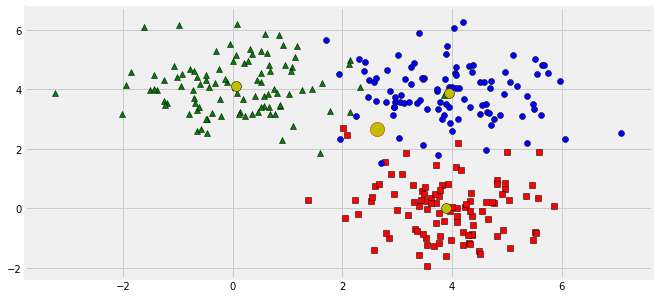

In [16]:
## visualize
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(111)
ax0.scatter(A[0],A[1],marker='s',c='r',edgecolor='black')
ax0.scatter(B[0],B[1],marker='^',c='g',edgecolor='black')
ax0.scatter(C[0],C[1],marker='o',c='b',edgecolor='black')
ax0.scatter(mean_A[0],mean_A[1],marker='o', s = 100, c='y',edgecolor='black')
ax0.scatter(mean_B[0],mean_B[1],marker='o', s = 100, c='y',edgecolor='black')
ax0.scatter(mean_C[0],mean_C[1],marker='o', s = 100, c='y',edgecolor='black')
ax0.scatter(mean_ABC[0],mean_ABC[1],marker='o', s = 200,c='y',edgecolor='red')
plt.show()


In [4]:

## calculate the scatters
scatter_A = np.dot(A-mean_A, np.transpose(A-mean_A))
scatter_B = np.dot(B-mean_B, np.transpose(B-mean_B))
scatter_C = np.dot(C-mean_C, np.transpose(C-mean_C))
scatter_ABC = np.dot(ABC-mean_ABC, np.transpose(ABC-mean_ABC))

## see the equilevant of scatter matrix and covariance matrix
print('@scatter matrix:\n',scatter_A)
print('\n@covariance matrix to scatter matrix:\n', np.cov(A) *99)


@scatter matrix:
 [[ 81.65221947 -11.69726509]
 [-11.69726509  90.03896521]]

@covariance matrix to scatter matrix:
 [[ 81.65221947 -11.69726509]
 [-11.69726509  90.03896521]]


In [5]:
## compute Sw, Sb
Sw = scatter_A + scatter_B + scatter_C
Sb = scatter_ABC - Sw

## computer eigen-values and eigen-vectors
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))

## get first 2 projections
eigen_pairs = zip(eigval, eigvec)
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = eigvec[:2]

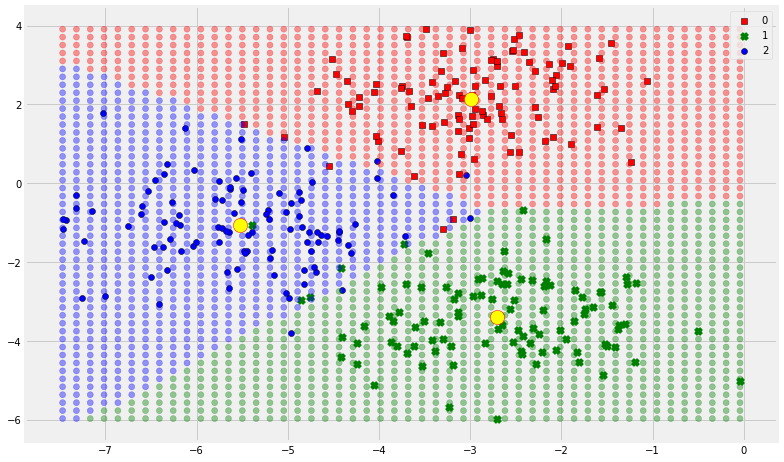

In [19]:
## transform
Projected = ABC.T.dot(w).T

## plot transformed feature and means
fig = plt.figure(figsize=(12, 8))
ax0 = fig.add_subplot(111)

means = []
for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    means.append(np.mean(Projected[:,y==l],axis=1))
    ax0.scatter(Projected[0][y==l],
                Projected[1][y==l],
                c=c, marker=m, label=l, edgecolors='black')
    
## make grid
mesh_x, mesh_y = np.meshgrid(np.linspace(min(Projected[0]),max(Projected[0])),
                             np.linspace(min(Projected[1]),max(Projected[1]))) 
mesh = []
for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        mesh.append((mesh_x[i][j],mesh_y[i][j]))
        
## make decision on grid points
from sklearn.neighbors import KNeighborsClassifier
NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))

## plot grid
ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.4)

## plot means
means = np.array(means)
ax0.scatter(means[:,0],means[:,1],marker='o',c='yellow', edgecolors='red', s=200)

ax0.legend(loc='upper right')
plt.show()